In [2]:
# imports and setup 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

data = pd.read_csv('../log.csv',sep=', ',engine='python')
print data.tail()

      cycle  observation  reward  action  explored  explore_rate  \
9538     32            5       0       0         0      0.003815   
9539     33            8       9       0         0      0.003434   
9540     34            8       0       2         0      0.003090   
9541     35            5       9       3         0      0.002781   
9542     36            5       0       0         0      0.002503   

      total reward  average reward  
9538           154         4.66667  
9539           163         4.79412  
9540           163         4.65714  
9541           172         4.77778  
9542           172         4.64865  


In [13]:
# get cycles per episode, average reward per episode

reward_offset = dict()
reward_offset["cheese-maze"] = 10

cycles = np.array(data[['cycle']])
rewards = np.array(data[['total reward']])
for i in xrange(len(rewards)):
    rewards[i] -= cycles[i]*reward_offset["cheese-maze"]
episode_lengths = list()
average_rewards = list()
for i in xrange(len(cycles)):
    if i==1:
        continue
    if cycles[i,0]==1:
        episode_lengths.append(cycles[i-1])
        average_rewards.append(float(rewards[i-1])/cycles[i-1])

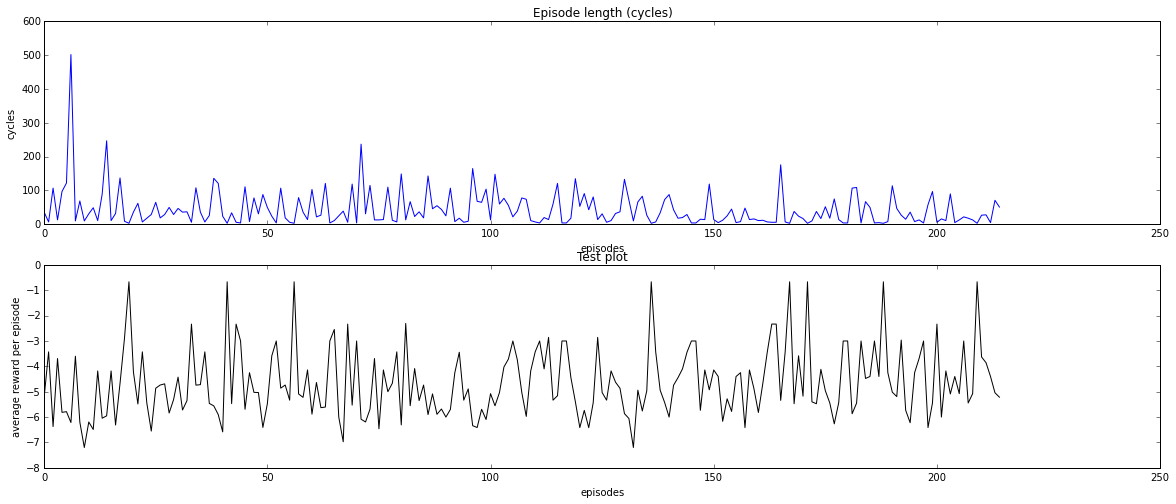

In [27]:

fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(211)
ax.set_title('Episode length (cycles)')
ax.set_xlabel('episodes')
ax.set_ylabel('cycles')
ax.plot(episode_lengths,label="Test")

ax = fig.add_subplot(212)
ax.set_title('Test plot')
ax.set_ylabel('average reward per episode')
ax.set_xlabel('episodes')
ax.plot(average_rewards,label="Test",color='k')
#plt.legend(loc='upper left')
plt.show()